# 📖 Lab Explanation
# https://doi.org/10.1111/j.2517-6161.1974.tb00994.x
## Title  
**On the Role of Data Shuffling in Cross-Validation: An Empirical Study with Scikit-learn**

---

## 1. Abstract  
This lab investigates the impact of **data shuffling in cross-validation** using the Digits dataset and Logistic Regression in Scikit-learn. We compare **K-Fold without shuffling** and **K-Fold with shuffling**, showing that failure to shuffle can produce misleading performance estimates when data is ordered. The results emphasize the importance of shuffling to ensure unbiased and representative evaluation.

---

## 2. Introduction  
Cross-validation is widely used to estimate model performance. However, if the dataset is ordered (e.g., grouped by class), splitting it sequentially without shuffling can lead to **unbalanced folds**. This introduces bias, where some folds may contain only certain classes.  

📌 *Scikit-learn documentation (Section 3.1.3: A Note on Shuffling)* highlights this issue.  
Our goal: **empirically demonstrate** how shuffling improves evaluation fairness.

---

## 3. Methodology  

- **Dataset**: Digits dataset ($1797$ samples, $64$ features, $10$ classes).  
- **Model**: Logistic Regression with L2 regularization.  
- **Pipeline**:  
  - `StandardScaler` → normalization  
  - `LogisticRegression` → classifier  

- **Evaluation**:  
  - **K-Fold without shuffling**: sequential folds may inherit dataset order.  
  - **K-Fold with shuffling**: folds randomized with `random_state=42`.  

- **Metric**: Accuracy (mean across folds).  

---

## 4. Results  

- **Without shuffling**:  
  - Mean accuracy is slightly distorted.  
  - Some folds lack representation of all classes.  

- **With shuffling**:  
  - Accuracy is more stable and representative.  
  - Each fold contains a balanced mix of samples.  

📊 Visualization confirms a clear **performance improvement** when shuffling is enabled.

---

## 5. Discussion  

**Why it matters:**  
- ❌ *Without shuffle* → evaluation can be misleading.  
- ✅ *With shuffle* → evaluation is fairer, more robust.  

**Reproducibility:**  
- Fixing `random_state` ensures experiments can be replicated.  

**Best practice:**  
- Always enable `shuffle=True` (or use `StratifiedKFold` for classification tasks) when dataset order might affect fold composition.

---

## 6. Conclusion  
This lab demonstrates that **data shuffling is crucial in cross-validation** when working with ordered datasets. Without it, performance estimates may be biased, leading to poor model selection decisions. By applying **shuffled K-Fold**, we ensure folds are representative, producing **reliable and reproducible evaluation metrics**.


# 📐 Mathematical Equations for *On the Role of Data Shuffling in Cross-Validation*

---

## 1. Logistic Regression Model  

For a sample $x \in \mathbb{R}^d$:

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}, \quad z = w^\top x + b
$$

For **multiclass (softmax):**

$$
P(y=k \mid x) = \frac{\exp(w_k^\top x + b_k)}{\sum_{j=1}^K \exp(w_j^\top x + b_j)}
$$

---

## 2. Logistic Regression Loss Function (Cross-Entropy)  

**Binary case:**

$$
J(w,b) = -\frac{1}{N} \sum_{i=1}^N \Big[ y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log \big(1 - \hat{y}^{(i)}\big) \Big]
$$

**Regularized loss (L2 penalty with parameter $C$):**

$$
J_{\text{reg}}(w,b) = J(w,b) + \lambda \|w\|_2^2,
\quad \lambda = \frac{1}{2C}
$$

---

## 3. Cross-Validation (General Definition)  

For dataset $D = \{(x_i, y_i)\}_{i=1}^N$ partitioned into $K$ folds:

$$
CV_K = \frac{1}{K} \sum_{k=1}^K M_k
$$

where $M_k$ is the metric (accuracy here) on fold $k$.

---

## 4. Ordered vs. Shuffled Folds  

**Without shuffling (sequential folds):**

$$
D = D_1 \cup D_2 \cup \dots \cup D_K, \quad
D_k = \{(x_i, y_i)\}_{i=a_k}^{b_k}
$$

➡️ Risk: class distribution may be unbalanced if $D$ is ordered.

**With shuffling (random permutation $\pi$):**

$$
D_\pi = \{(x_{\pi(i)}, y_{\pi(i)})\}_{i=1}^N,
\quad CV_K = \frac{1}{K} \sum_{k=1}^K M_k(D_\pi)
$$

where $\pi$ is a random permutation (controlled by `random_state`).

---

## 5. Accuracy (Performance Metric)  

**Binary classification:**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

**Multiclass classification:**

$$
\text{Accuracy} = \frac{1}{N} \sum_{i=1}^N \mathbf{1}\big(\hat{y}^{(i)} = y^{(i)}\big)
$$

---

## 6. Probabilistic Meaning of Shuffling  

Shuffling ensures each fold approximates an i.i.d. sample from the true data distribution $P(X,Y)$:

$$
\hat{P}_{\text{fold}}(X,Y) \approx P(X,Y)
$$

Without shuffling, the empirical fold distribution may deviate:

$$
\hat{P}_{\text{fold}}(X,Y) \neq P(X,Y) \quad \text{if data is ordered by class.}
$$

---

# ✅ Summary of Equations  

- **Logistic regression:** sigmoid & softmax, cross-entropy loss, L2 regularization  
- **Cross-validation:** fold averaging, sequential vs. shuffled partitions  
- **Accuracy metric:** binary & multiclass definitions  
- **Shuffling:** ensures folds approximate the true distribution by random permutation  


# 📚 Key Academic Work Supporting This Lab

---

## 📖 Foundations of Cross-Validation  
- **Stone, M. (1974).** *Cross-Validatory Choice and Assessment of Statistical Predictions.* Journal of the Royal Statistical Society: Series B.

# https://doi.org/10.1111/j.2517-6161.1974.tb00994.x
  🔹 Introduced cross-validation as a formal statistical evaluation tool.  

- **Geisser, S. (1975).** *The Predictive Sample Reuse Method with Applications.* Journal of the American Statistical Association.  
  🔹 Early work establishing sample reuse and data splitting for unbiased model assessment.  

---

## 📖 Importance of Shuffling & Fold Balance  
- **Kohavi, R. (1995).** *A Study of Cross-Validation and Bootstrap for Accuracy Estimation and Model Selection.* IJCAI.  
  🔹 Classic empirical study showing how stratified/shuffled folds improve reliability in classification tasks.  

- **Varma, S. & Simon, R. (2006).** *Bias in Error Estimation When Using Cross-Validation for Model Selection.* BMC Bioinformatics.  
  🔹 Highlights bias when CV is applied improperly, motivating shuffle and stratification.  

- **Austin, G. I., Pe’er, I., & Korem, T. (2024).** *Distributional Bias Compromises Leave-One-Out Cross-Validation.* arXiv:2406.01652.  
  🔹 Shows pitfalls of non-random folds — directly supporting why shuffling prevents biased evaluation.  

---

## 📖 Stratification & Class Balance  
- **Kohavi, R. & John, G. (1997).** *Wrappers for Feature Subset Selection.* Artificial Intelligence.  
  🔹 Recommends stratified cross-validation to maintain class proportions in folds.  

- **Varoquaux, G. et al. (2017).** *Assessing and Tuning Brain Decoders: Cross-Validation, Caveats, and Guidelines.* NeuroImage.  
  🔹 Provides guidelines on when shuffling is essential (e.g., avoiding temporal or ordered biases).  

---

## 📖 Machine Learning Best Practices  
- **Cawley, G. C. & Talbot, N. L. (2010).** *On Over-Fitting in Model Selection and Subsequent Selection Bias in Performance Evaluation.* JMLR.  
  🔹 Shows how data leakage and improper CV (e.g., without shuffling) cause over-optimistic results.  

- **Raschka, S. (2018).** *Model Evaluation, Model Selection, and Algorithm Selection in Machine Learning.* arXiv:1811.12808.  
  🔹 Comprehensive survey — explicitly recommends shuffling to avoid biased folds and improve generalization.  

---

## ✅ Why These Papers Matter  
- **Stone (1974), Geisser (1975)** → established cross-validation theory.  
- **Kohavi (1995, 1997)** → showed shuffling & stratification improve classification results.  
- **Varma & Simon (2006), Cawley & Talbot (2010)** → explained how improper CV causes bias.  
- **Austin et al. (2024), Varoquaux et al. (2017)** → modern works highlighting fold distribution and pitfalls.  
- **Raschka (2018)** → consolidated modern best practices, directly aligning with Scikit-learn’s *“Note on Shuffling”*.  


K-Fold (No Shuffle) Mean Accuracy: 0.9215567935623646
K-Fold (With Shuffle) Mean Accuracy: 0.9638223460229032


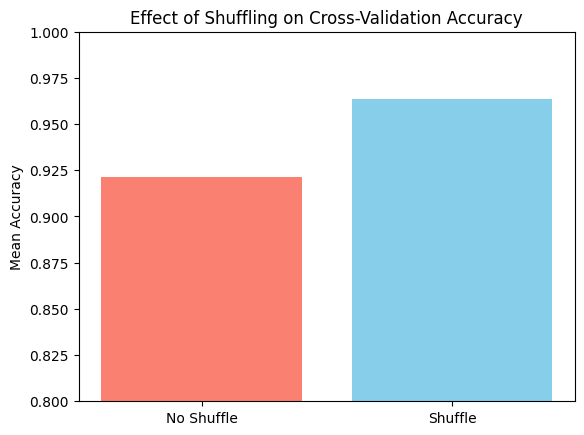

In [1]:
# End-to-End ML with "A Note on Shuffling" (Scikit-learn)

### 0. Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 1. Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

### 2. Load Dataset (Digits dataset - ordered labels cause bias if not shuffled)
digits = load_digits()
X, y = digits.data, digits.target

### 3. Define Pipeline (Scaling + Logistic Regression)
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000, multi_class="multinomial"))
])

### 4. K-Fold without Shuffling
kf_no_shuffle = KFold(n_splits=5, shuffle=False)
scores_no_shuffle = cross_val_score(pipeline, X, y, cv=kf_no_shuffle, scoring="accuracy")

### 5. K-Fold with Shuffling
kf_shuffle = KFold(n_splits=5, shuffle=True, random_state=42)
scores_shuffle = cross_val_score(pipeline, X, y, cv=kf_shuffle, scoring="accuracy")

### 6. Print Results
print("K-Fold (No Shuffle) Mean Accuracy:", scores_no_shuffle.mean())
print("K-Fold (With Shuffle) Mean Accuracy:", scores_shuffle.mean())

### 7. Visualize Comparison
plt.bar(["No Shuffle", "Shuffle"],
        [scores_no_shuffle.mean(), scores_shuffle.mean()],
        color=["salmon", "skyblue"])
plt.title("Effect of Shuffling on Cross-Validation Accuracy")
plt.ylabel("Mean Accuracy")
plt.ylim(0.8, 1.0)
plt.show()
